# Helligkeit und Kontrast

Bei der Visualisierung von Bildern in Jupyter Notebooks ist es wichtig, sie so darzustellen, dass ein Leser sehen kann, worüber wir schreiben. Daher ist die Anpassung von Helligkeit und Kontrast wichtig. Wir können dies durch Änderung des _Anzeigebereichs_, des Bereichs der angezeigten Grauwerte, erreichen.

Zu Demonstrationszwecken verwenden wir das [cells3d Beispielbild von scikit-image](https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.cells3d).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import cells3d

Der `cells3d` Datensatz ist ein 4D-Bild. Mit Hilfe des Array-Zugriffs extrahieren wir eine einzelne 2D-Schicht und zeigen sie an.

In [2]:
image = cells3d()[30,0]
image.shape

(256, 256)

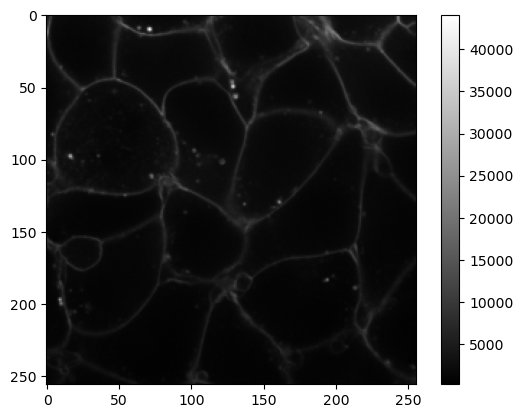

In [3]:
plt.imshow(image, cmap='gray')
plt.colorbar()

Beachten Sie, dass hier die Farbskala von 0 bis etwa 45000 reicht. Die matplotlib `plt.imshow()` Funktion passt den Bildkontrast an die minimalen und maximalen Werte an.

Die minimalen und maximalen Pixelwerte können auch so ermittelt werden:

In [4]:
min_value = image.min()
max_value = image.max()
print('min value = ', min_value)
print('max value = ', max_value)

min value =  277
max value =  44092


Wenn wir die Helligkeit erhöhen möchten, d.h. die Wahrnehmung, dass das Bild mehr Licht ausstrahlt, können wir den Anzeigebereich konfigurieren, indem wir sein Minimum `vmin` und Maximum `vmax` festlegen. Dies verbessert die Sichtbarkeit der Membranen.

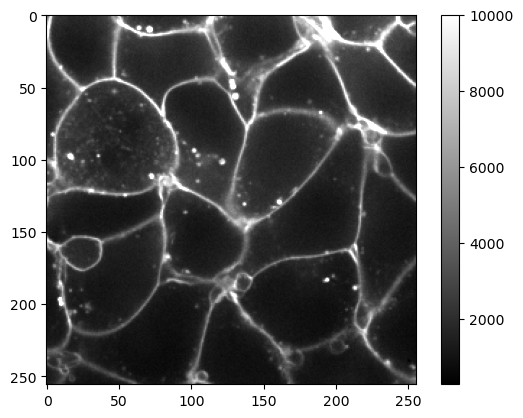

In [5]:
plt.imshow(image, cmap='gray', vmax=10000)
plt.colorbar()

## Anpassung der Visualisierung unabhängig vom spezifischen Bild
Das nächste Bild, das wir öffnen, hat möglicherweise einen ähnlichen Grauwertbereich oder auch nicht. Daher könnten wir das Histogramm des Bildes untersuchen und manuell einen besseren Schwellenwert erraten.

(array([5.8622e+04, 5.6930e+03, 9.7800e+02, 1.6900e+02, 5.5000e+01,
        1.0000e+01, 5.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([  277. ,  4658.5,  9040. , 13421.5, 17803. , 22184.5, 26566. ,
        30947.5, 35329. , 39710.5, 44092. ]),
 <BarContainer object of 10 artists>)

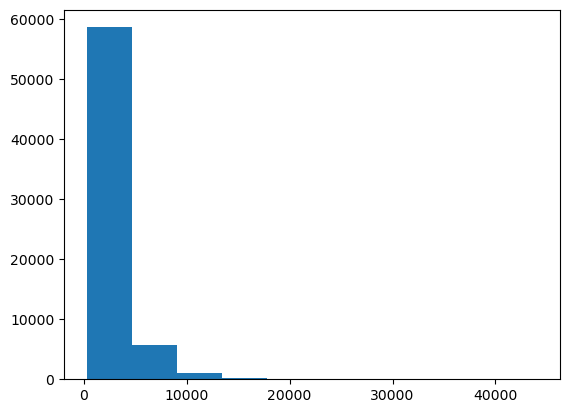

In [6]:
plt.hist(image.ravel())

Histogramme von Bildern werden oft mit einer [logarithmischen Skala](https://de.wikipedia.org/wiki/Logarithmische_Skala) angezeigt.

(array([5.8622e+04, 5.6930e+03, 9.7800e+02, 1.6900e+02, 5.5000e+01,
        1.0000e+01, 5.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([  277. ,  4658.5,  9040. , 13421.5, 17803. , 22184.5, 26566. ,
        30947.5, 35329. , 39710.5, 44092. ]),
 <BarContainer object of 10 artists>)

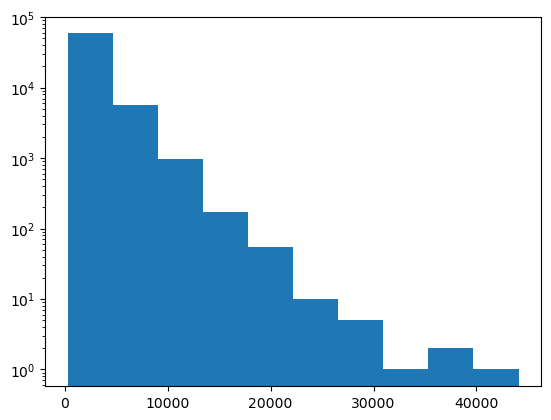

In [7]:
plt.hist(image.ravel(), log=True)

Offensichtlich hat dieses Bild viele dunkle Grauwerte (< 20000) und wenige Werte > 40000.

Es könnte sinnvoll sein, die Visualisierung mit einem Prozentsatz zu konfigurieren. Angenommen, wir möchten das Bild so visualisieren, dass 95% der Pixel im Bereich liegen. Wir können dies mit der [Perzentil-Methode von numpy](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html) tun. Wir werden am Ende des Semesters auch auf Perzentile zurückkommen.

In [8]:
upper_limit = np.percentile(image, 95)
upper_limit

6580.0

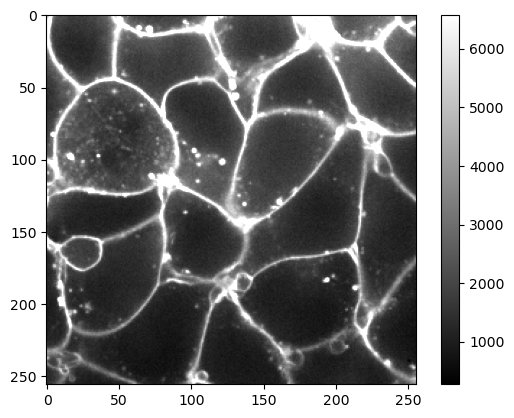

In [9]:
plt.imshow(image, cmap='gray', vmax=upper_limit)
plt.colorbar()

# Übung

Der `cells3d` Datensatz enthält einen weiteren Kanal, der die Zellkerne zeigt. Visualisieren Sie ihn so, dass 99% der unteren Grauwerte ordnungsgemäß visualisiert werden.

In [10]:
nuclei = cells3d()[30,1]
nuclei.shape

(256, 256)